In [89]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_validate

In [104]:
# Training set
ts = pd.read_csv('features.csv')
ts['longitude'] = ts['longitude']/1000
ts['latitude'] = ts['latitude']/1000
ts['logerror'] = ts['logerror'].apply(lambda x: (math.exp(x)*10))
y = ts[['logerror']]
X = ts[['calculatedfinishedsquarefeet','lotsizesquarefeet',\
        'bedroomcnt','longitude','latitude','taxamount',\
        'regionidzip','month','yearbuilt']]
# Split data with 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))

(115563, 9)
(115563, 1)
(49528, 9)
(49528, 1)
0.6999957599142291


In [107]:
# lr.score(X_test, y_test, sample_weight=1/y_test)
def mape_loss(t,p):
    sum = 0
    for i in range(t.shape[0]):
        sum += abs((t[i]-p[i])/t[i])
    return sum/t.shape[0]

mape = metrics.make_scorer(mape_loss, greater_is_better=False)

def metric_lr(X_train, y_train, X_test, y_test, model, cri):
    print("Intercept %s:" % model.intercept_)
    print("Coefficients %s:" % model.coef_)
    fit_time = 0
    score_time = 0
    test_score = 0
    train_score = 0
    result = cross_validate(model, X_test, y_test, scoring=cri)
    for i in range(3):
        fit_time += result['fit_time'][i]
        score_time += result['score_time'][i]
        test_score += result['test_score'][i]
        train_score += result['train_score'][i]
    pred = model.predict(X_test)
    m = mape_loss(y_test, pred)
    return [fit_time/3, score_time/3, test_score/3, train_score/3, m]
#     print("R Squared: %s" % model.score(X_test, y_test))
#     print("Mean Squared Error: %s" % metrics.mean_squared_error(y_test, y_pred))
#     print("Root MSE: %s" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#     print("Mean Absolute Percent Error: %.2f%%" % mape(y_test.reset_index()['logerror'], y_pred))

In [109]:
# Multi-Linear Regression with MRE
frames = []
for i in range(5):
    print("Round %d:" % (i+1))
    lr = LinearRegression(normalize=True)
    lr.fit(X_train, y_train)
    metric = metric_lr(X_train, np.array(y_train), X_test, np.array(y_test), lr, 'neg_mean_squared_error')
    print(metric)
    result = pd.DataFrame.from_items([(i,metric)], \
                                     orient='index', \
                                     columns=['fit_time','score_time','test_score','train_score','MAPE'])
    frames.append(result)
    print("****************************")
m = pd.concat(frames)
print(m)

Round 1:
Intercept [ 7.6762999]:
Coefficients [[  4.37437700e-05   4.31573674e-08   1.66877317e-02  -2.36797220e-05
   -8.08341201e-05  -8.07621716e-06  -3.79139296e-07   2.87768784e-03
    1.15102059e-03]]:
[0.011924346288045248, 0.0013284683227539062, -0.38456364605773224, -0.38418380141144431, array([ 0.04330424])]
****************************
Round 2:
Intercept [ 7.6762999]:
Coefficients [[  4.37437700e-05   4.31573674e-08   1.66877317e-02  -2.36797220e-05
   -8.08341201e-05  -8.07621716e-06  -3.79139296e-07   2.87768784e-03
    1.15102059e-03]]:
[0.013404210408528646, 0.0012015501658121746, -0.38456364605773224, -0.38418380141144431, array([ 0.04330424])]
****************************
Round 3:
Intercept [ 7.6762999]:
Coefficients [[  4.37437700e-05   4.31573674e-08   1.66877317e-02  -2.36797220e-05
   -8.08341201e-05  -8.07621716e-06  -3.79139296e-07   2.87768784e-03
    1.15102059e-03]]:
[0.013487021128336588, 0.001282056172688802, -0.38456364605773224, -0.38418380141144431, array

In [110]:
# # Multi-Linear Regression with MAPE
# frames = []
# for i in range(5):
#     print("Round %d:" % (i+1))
#     lr = LinearRegression(normalize=True)
#     lr.fit(X_train, y_train)
#     metrics = metric_lr(X_train, y_train, X_test, y_test, lr, mape)
#     print(metrics)
#     result = pd.DataFrame.from_items([(i,metrics)], \
#                                      orient='index', \
#                                      columns=['fit_time','score_time','test_score','train_score'])
#     frames.append(result)
#     print("****************************")
# m = pd.concat(frames)
# print(m)

In [308]:
# from sklearn import datasets
# boston = datasets.load_boston()
# def df2skdata(df):
#     i = 0
#     skdata = []
#     for row in range(df.shape[0]):
#         j = 0
#         for co in range(df.shape[1]):
#             r = []
#             r.append(df.ix[i,j])
#         skdata.append(r)
#     return skdata

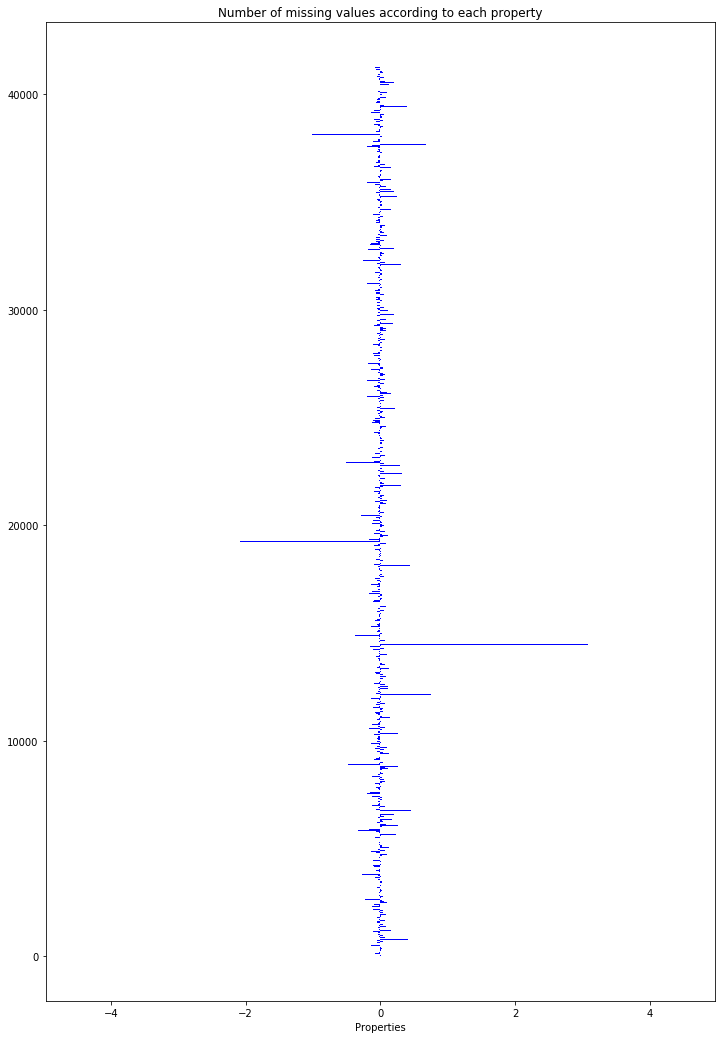

In [57]:
ind = np.arange(error.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, error.values, color='blue')
ax.set_xlabel("Number of missing values")
ax.set_xlabel("Properties")
ax.set_title("Number of missing values according to each property")
plt.show()

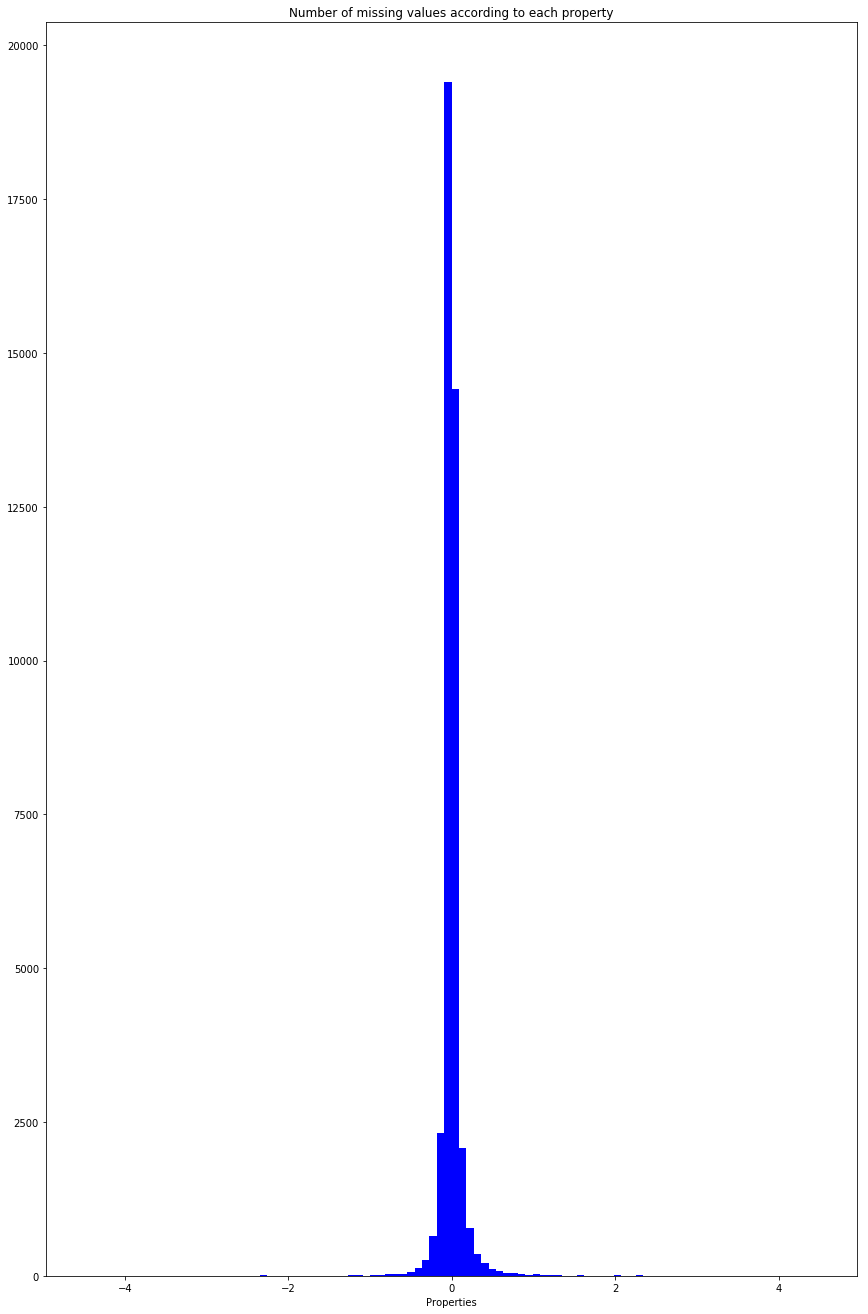

In [60]:
f, ax = plt.subplots(figsize=(12,18))
f.tight_layout()
rects = ax.hist(error.values, bins=100, color='blue')
ax.set_xlabel("Number of missing values")
ax.set_xlabel("Properties")
ax.set_title("Number of missing values according to each property")
plt.show()

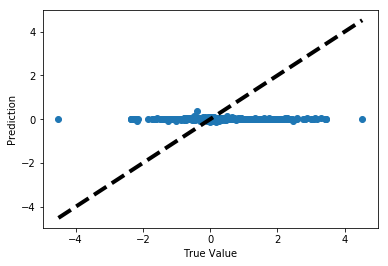

In [61]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('True Value')
ax.set_ylabel('Prediction')
plt.show()